In [1]:
import graph_generator as gg
import obm_dp as dp
import numpy as np
import matplotlib.pyplot as plt
from dp_analysis import NODE_FUNCS, expected_quantities

%load_ext autoreload
%autoreload 2

In [2]:
def monte_carlo_layer_quantity(m: int, n: int, num_graphs: int, node_func: callable, **kwargs):
    data = []
    for _ in range(num_graphs):
        A = gg.sample_bipartite_graph(m, n, **kwargs)
        p = [0.75 for _ in range(m)]
        cache = {}
        cache = dp.cache_stochastic_opt(A, p)
        layers, quantities = expected_quantities(cache, node_func, A)
        data.append(quantities)
   
    return layers, np.array(data)


def plot_err(layers, means, errs, labels, ylabel):
    _ = plt.figure(figsize=(10, 7))
    ax = plt.gca()
    for i in range(len(means)):
        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(layers, means[i], label=labels[i], color=color)
        plt.fill_between(layers, means[i] - errs[i], means[i] + errs[i], alpha=0.25, color=color)
    
    plt.xlabel('DP Layer')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


def analyze_dp(
    m: int,
    n: int,
    num_graphs: int,
    node_func: callable,
    **graph_kwargs
) -> None:
    
    layers, data = monte_carlo_layer_quantity(m, n, num_graphs, node_func, **graph_kwargs)
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0, ddof=1)
    errs = 2 * stds / np.sqrt(num_graphs)
    return layers, means, errs 

    

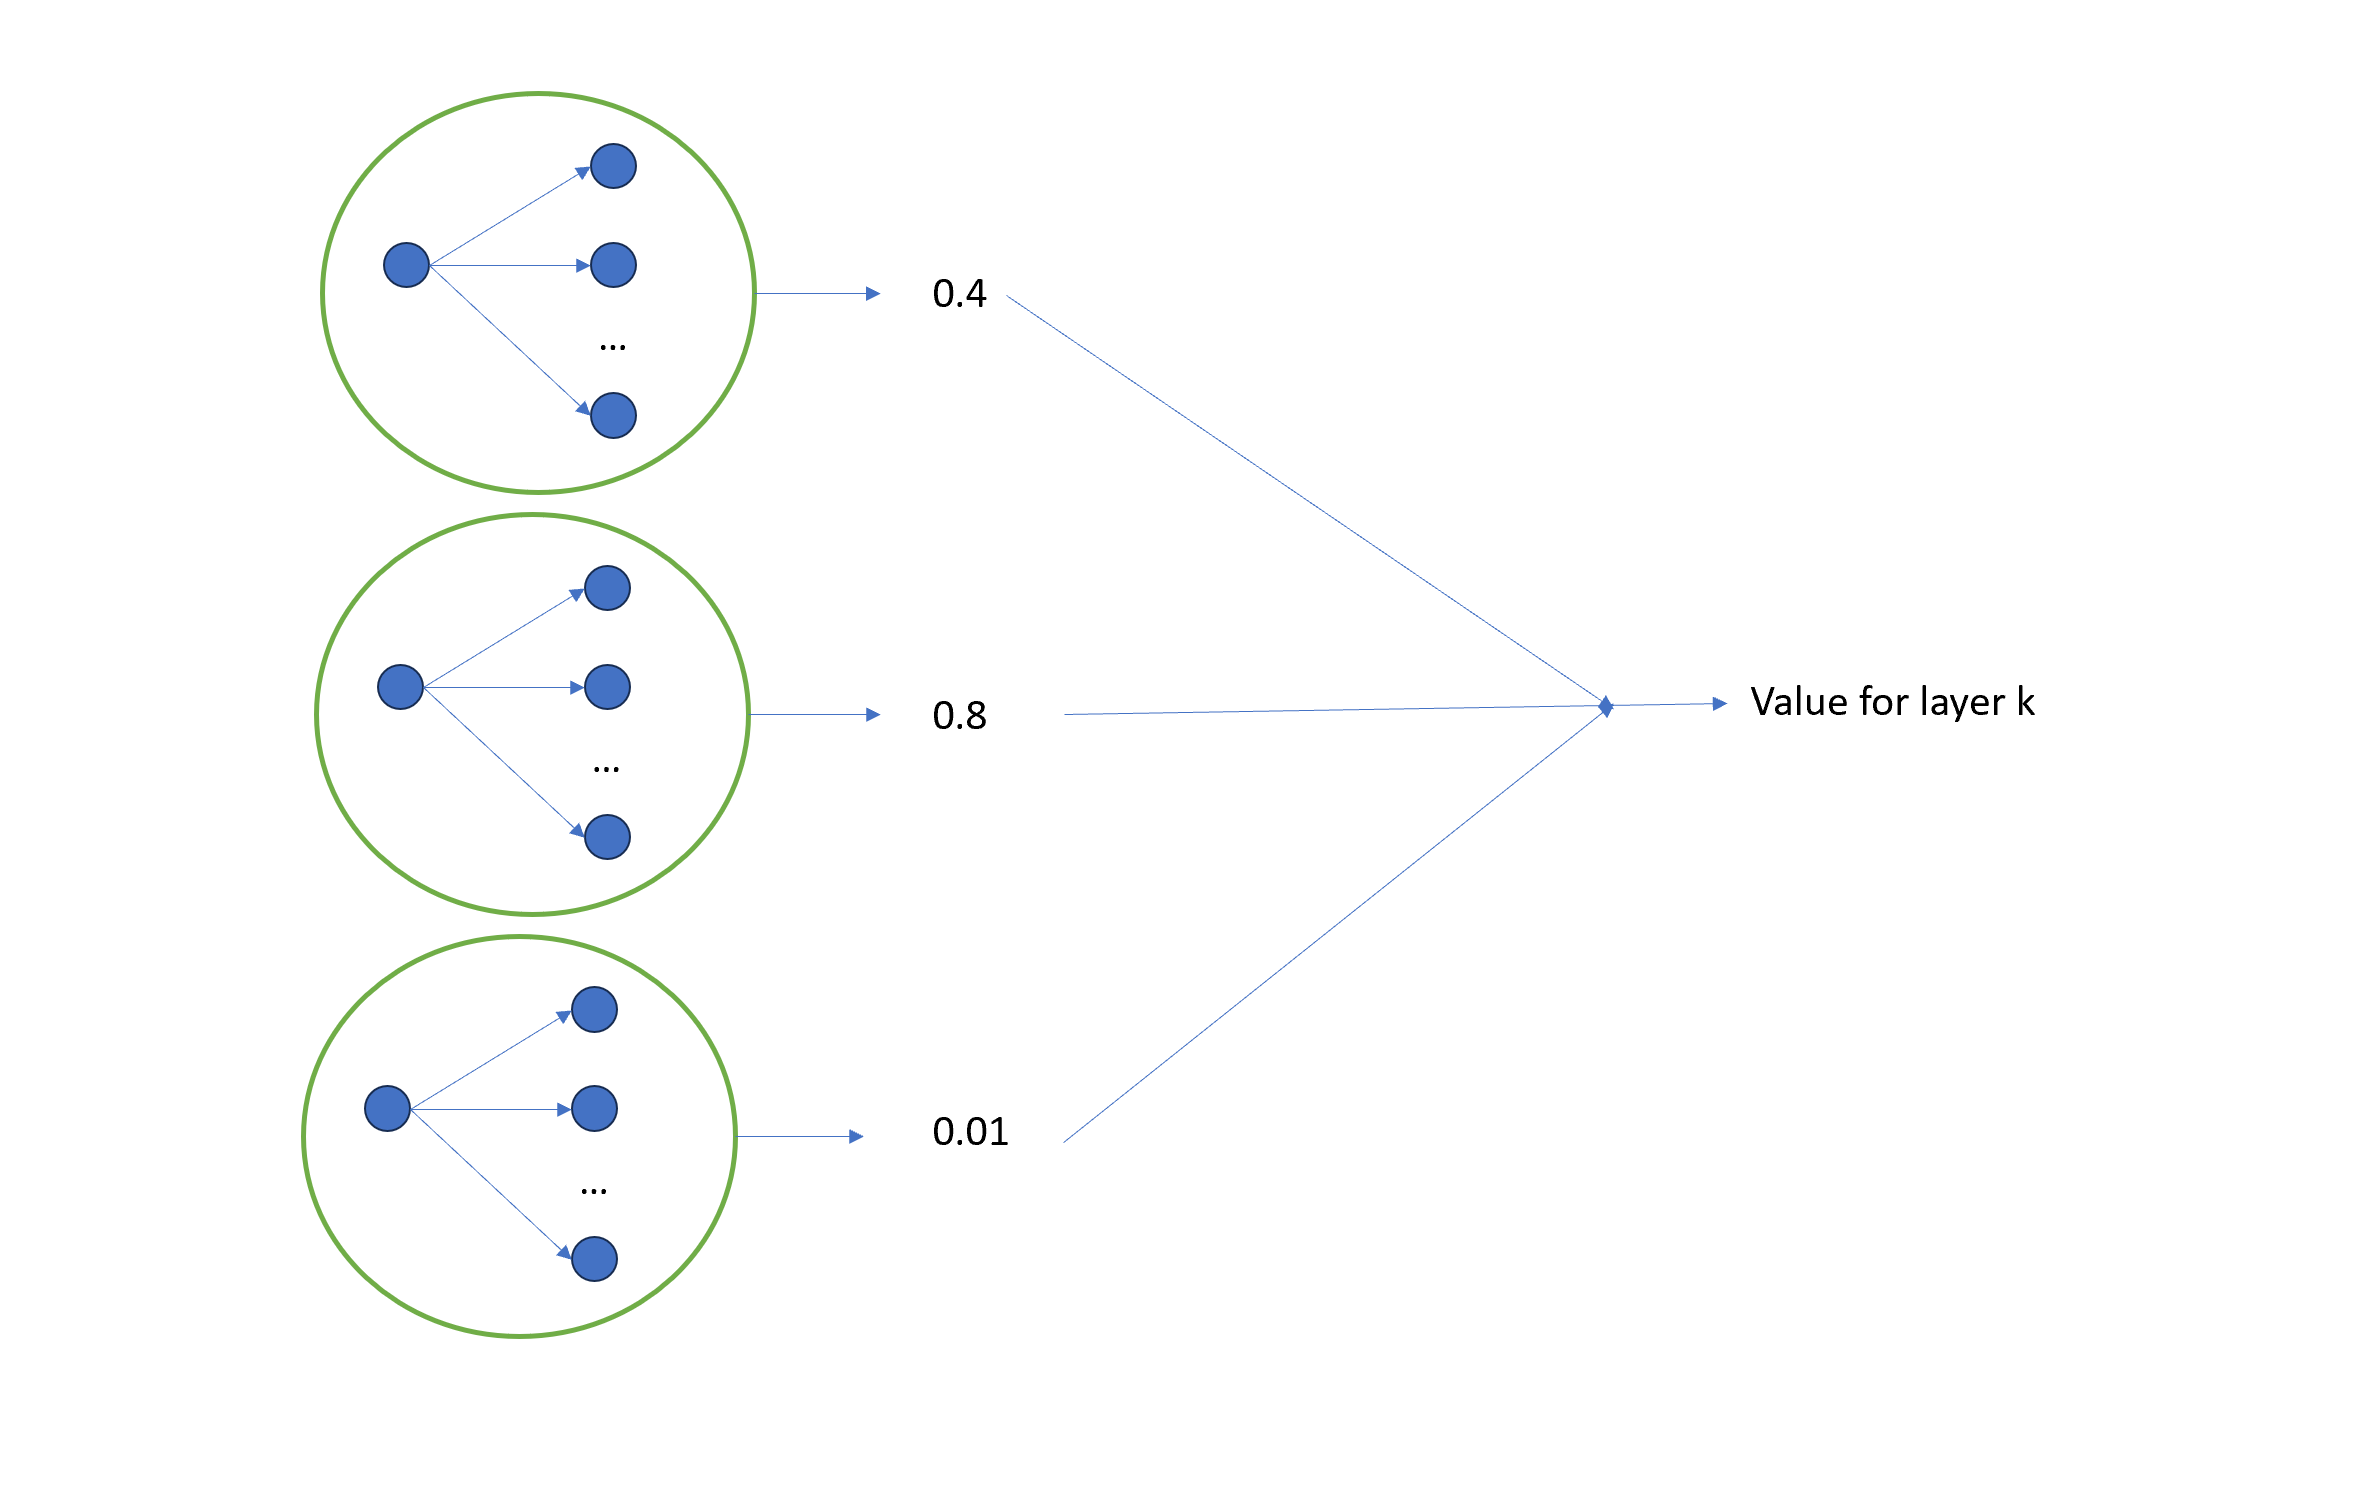

In [ ]:
m = 8; n = 8; num_graphs = 2500

graph_configs = [
    {
        'label': 'ER(0.25)',
        'graph_type': 'ER',
        'p': 0.25,
        'weighted': True
    },
    {
        'label': 'ER(0.75)',
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    {
        'label': 'BA(2)',
        'graph_type': 'BA',
        'ba_param': 2,
        'weighted': True
    },
    {
        'label': 'BA(4)',
        'graph_type': 'BA',
        'ba_param': 4,
        'weighted': True
    },
    {
        'label': 'GEOM(0.2)',
        'graph_type': 'GEOM',
        'threshold': 0.2,
        'scaling': 1/ np.sqrt(2)
    },
    {
        'label': 'GEOM(0.6)',
        'graph_type': 'GEOM',
        'threshold': 0.6,
        'scaling': 1/ np.sqrt(2)
    }
]

In [ ]:
node_func = NODE_FUNCS['std']
means = []
errs = []
labels = []
for config in graph_configs:
    print(f"Started {config['label']}")
    layer, mean, err = analyze_dp(m, n, num_graphs, node_func, **config)
    means.append(mean)
    errs.append(err)
    labels.append(config['label'])

In [ ]:
plot_err(layer, means, errs, labels, 'Average fractional reduction to OPT')

## Greedy suboptimality

In [ ]:
node_func = NODE_FUNCS['greedy_suboptimality']
means = []
errs = []
labels = []
for config in graph_configs:
    print(f"Started {config['label']}")
    layer, mean, err = analyze_dp(m, n, num_graphs, node_func, **config)
    means.append(mean)
    errs.append(err)
    labels.append(config['label'])

In [ ]:
plot_err(layer, means, errs, labels, 'Average fractional reduction to OPT')

## Uniform suboptimality

In [ ]:
node_func = NODE_FUNCS['uniform_suboptimality']
means = []
errs = []
labels = []
for config in graph_configs:
    print(f"Started {config['label']}")
    layer, mean, err = analyze_dp(m, n, num_graphs, node_func, **config)
    means.append(mean)
    errs.append(err)
    labels.append(config['label'])

In [ ]:
plot_err(layer, means, errs, labels, 'Average fractional reduction to OPT')

## Greedy Correctness

In [ ]:
node_func = NODE_FUNCS['greedy_correctness']
means = []
errs = []
labels = []
for config in graph_configs:
    print(f"Started {config['label']}")
    layer, mean, err = analyze_dp(m, n, num_graphs, node_func, **config)
    means.append(mean)
    errs.append(err)
    labels.append(config['label'])

In [ ]:
plot_err(layer, means, errs, labels, 'Proportion of correct decisions')

## Uniform correctness

In [ ]:
node_func = NODE_FUNCS['uniform_correctness']
means = []
errs = []
labels = []
for config in graph_configs:
    print(f"Started {config['label']}")
    layer, mean, err = analyze_dp(m, n, num_graphs, node_func, **config)
    means.append(mean)
    errs.append(err)
    labels.append(config['label'])

In [ ]:
plot_err(layer, means, errs, labels, 'Proportion of correct decisions')

## KL Divergence with Uniform

In [ ]:
node_func = NODE_FUNCS['relative_entropy']
means = []
errs = []
labels = []
for config in graph_configs:
    print(f"Started {config['label']}")
    layer, mean, err = analyze_dp(m, n, num_graphs, node_func, **config)
    means.append(mean)
    errs.append(err)
    labels.append(config['label'])

In [ ]:
plot_err(layer, means, errs, labels, 'Average KL divergence with uniform')

In [ ]:
node_func = NODE_FUNCS['range']
means = []
errs = []
labels = []
for config in graph_configs:
    print(f"Started {config['label']}")
    layer, mean, err = analyze_dp(m, n, num_graphs, node_func, **config)
    means.append(mean)
    errs.append(err)
    labels.append(config['label'])

In [ ]:
plot_err(layer, means, errs, labels, 'Average (max - min) value-to-go')